# Data analysis

Library imports 

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Bio import pairwise2
from Bio.Seq import Seq
from tqdm import tqdm
import subprocess
import os
import shutil
import glob
import sys

import os
os.chdir('write here the absolute path to the project root')

# ANSI escape code for colored text
yellow = '\033[93m'
green = '\033[92m'
reset = '\033[0m'
red = '\033[91m'

# Check if a virtual environment is active
if not hasattr(sys, 'base_prefix') or sys.base_prefix == sys.prefix:
    raise EnvironmentError(f'{red}No virtual environment is activated. Please activate venv_2 to run this code. See ReadMe for more details.{reset}')

# Get the name of the activated virtual environment (venv_2 is the one required here) 
venv_path = os.environ.get('VIRTUAL_ENV')
if venv_path is None:
    raise EnvironmentError(f'{red}Error, venv path is none. Please activate the venv_2. See ReadMe for more details.{reset}')

venv_name = os.path.basename(venv_path)
if venv_name != 'venv_2':
    raise EnvironmentError(f'{red}The activated virtual environment is '{venv_name}', not 'venv_2'. However venv_2 must be activated to run this code. See ReadMe for more details.{reset}')


/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe/venv_2/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Dataset imports

In [ ]:
# train

df_train = pd.read_csv('./data/Dataset/csv/Train.csv')
# Extract Super Families (SF column) 
y_train = df_train['SF'].tolist()
# Extract AA Sequences
AA_sequences_train = df_train['Sequence'].tolist()


# val

df_val = pd.read_csv('./data/Dataset/csv/Val.csv')
# Extract Super Families (SF column)
y_val = df_val['SF'].tolist()
# Extract AA Sequences
AA_sequences_val = df_val['Sequence'].tolist()


# test

df_test = pd.read_csv('./data/Dataset/csv/Test.csv')
# Extract Super Families (SF column)
y_test = df_test['SF'].tolist()
# Extract AA Sequences
AA_sequences_test = df_test['Sequence'].tolist()

## 1. AA sequences (AA means Amino Acid)

### 1.1 AA type statistics

In [ ]:
def count_amino_acids(sequence_list):
    # Initialize a Counter
    aa_counter = Counter()
    
    # Iterate through each sequence and update the counter
    for sequence in sequence_list:
        aa_counter.update(sequence)
    
    return aa_counter

def print_amino_acid_proportions(aa_count, dataset_name):
    total_aa = sum(aa_count.values())
    print(f'\n{dataset_name} Amino Acid Counts and Proportions:')
    for aa, count in aa_count.items():
        proportion = count / total_aa
        print(f'{aa}: {count} ({proportion:.2%})')

# Count amino acids in each dataset
train_aa_count = count_amino_acids(AA_sequences_train)
val_aa_count = count_amino_acids(AA_sequences_val)
test_aa_count = count_amino_acids(AA_sequences_test)

# Print results
print_amino_acid_proportions(train_aa_count, 'Train')
print_amino_acid_proportions(val_aa_count, 'Validation')
print_amino_acid_proportions(test_aa_count, 'Test')




Train Amino Acid Counts and Proportions:
N: 4636984 (4.48%)
A: 9233029 (8.92%)
Y: 3329127 (3.21%)
Q: 4039084 (3.90%)
H: 2348145 (2.27%)
G: 6696319 (6.47%)
T: 5816165 (5.62%)
P: 4089910 (3.95%)
L: 10519497 (10.16%)
M: 1999872 (1.93%)
D: 5980986 (5.78%)
W: 1280859 (1.24%)
K: 5500377 (5.31%)
V: 6846672 (6.61%)
S: 7298022 (7.05%)
E: 6567647 (6.34%)
I: 6031510 (5.82%)
F: 4009142 (3.87%)
R: 5806675 (5.61%)
C: 1482549 (1.43%)
X: 41182 (0.04%)
B: 18 (0.00%)
U: 12 (0.00%)
O: 2 (0.00%)
Z: 9 (0.00%)

Validation Amino Acid Counts and Proportions:
Y: 33727 (3.41%)
Q: 37967 (3.84%)
S: 60798 (6.15%)
L: 95020 (9.60%)
M: 15875 (1.60%)
V: 69121 (6.99%)
G: 69264 (7.00%)
H: 25794 (2.61%)
A: 79710 (8.06%)
P: 43391 (4.39%)
E: 68844 (6.96%)
D: 57563 (5.82%)
T: 52974 (5.35%)
F: 39104 (3.95%)
I: 56368 (5.70%)
N: 41522 (4.20%)
R: 52205 (5.28%)
K: 57643 (5.83%)
X: 6643 (0.67%)
W: 13321 (1.35%)
C: 12520 (1.27%)

Test Amino Acid Counts and Proportions:
Y: 33637 (3.40%)
R: 51535 (5.22%)
E: 69481 (7.03%)
L: 94576 (

### 1.2 AA sequence length statistics

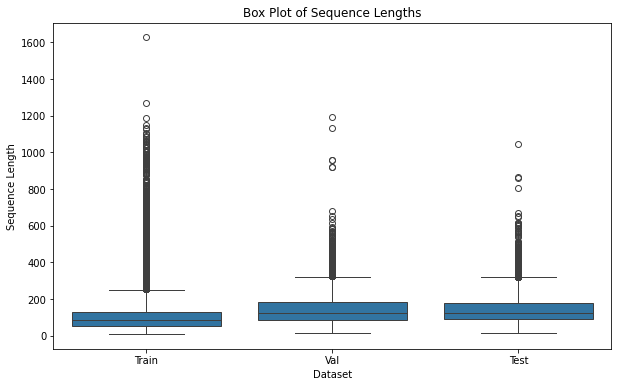

In [ ]:
# Calculate sequence lengths
train_lengths = [len(seq) for seq in AA_sequences_train]
val_lengths = [len(seq) for seq in AA_sequences_val]
test_lengths = [len(seq) for seq in AA_sequences_test]

# Prepare data for plotting
data = pd.DataFrame({
    'Length': train_lengths + val_lengths + test_lengths,
    'Dataset': ['Train'] * len(train_lengths) + ['Val'] * len(val_lengths) + ['Test'] * len(test_lengths)
})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='Length', data=data)
plt.title('Box Plot of Sequence Lengths')
plt.xlabel('Dataset')
plt.ylabel('Sequence Length')
plt.show()

In [ ]:

# Calculate the shortest and longest sequences in each dataset
train_shortest = min(train_lengths)
train_longest = max(train_lengths)
val_shortest = min(val_lengths)
val_longest = max(val_lengths)
test_shortest = min(test_lengths)
test_longest = max(test_lengths)

# Print results
print('\nSequence Lengths:')
print(f'Train: Shortest={train_shortest}, Longest={train_longest}')
print(f'Validation: Shortest={val_shortest}, Longest={val_longest}')
print(f'Test: Shortest={test_shortest}, Longest={test_longest}')



Sequence Lengths:
Train: Shortest=10, Longest=1627
Validation: Shortest=14, Longest=1192
Test: Shortest=13, Longest=1047


### 1.3 AA transition matrix

In [ ]:
amino_acids = 'ACDEFGHIKLMNPQRSTVWYXBUOZ'

def calculate_transition_matrix(sequence_list):
    # Initialize a transition matrix
    transition_matrix = np.zeros((len(amino_acids), len(amino_acids)))
    
    # Set to store unknown amino acids
    unknown_amino_acids = set()
    
    # Iterate through each sequence and update the transition matrix
    for sequence in sequence_list:
        for i in range(len(sequence) - 1):
            # Get the current and next amino acids
            current_aa = sequence[i]
            next_aa = sequence[i + 1]
            
            if current_aa not in amino_acids:
                unknown_amino_acids.add(current_aa)
                continue
            if next_aa not in amino_acids:
                unknown_amino_acids.add(next_aa)
                continue
            
            # Update the transition matrix
            current_idx = amino_acids.index(current_aa)
            next_idx = amino_acids.index(next_aa)
            transition_matrix[current_idx, next_idx] += 1
    
    # Print unknown amino acids
    if unknown_amino_acids:
        print(f'Unknown amino acids found: {', '.join(unknown_amino_acids)}')
    
    # Normalize the transition matrix
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums != 0)

    # Set rows with zero sums to zero
    transition_matrix[row_sums.flatten() == 0] = 0
    
    return transition_matrix

def plot_transition_matrix(transition_matrix, title):
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(transition_matrix, cmap='viridis', xticklabels=list(amino_acids), yticklabels=list(amino_acids), vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel('Next Amino Acid')
    plt.ylabel('Current Amino Acid')
    plt.show()

# Calculate transition matrices for each dataset
train_transition_matrix = calculate_transition_matrix(AA_sequences_train)
val_transition_matrix = calculate_transition_matrix(AA_sequences_val)
test_transition_matrix = calculate_transition_matrix(AA_sequences_test)

# Plot transition matrices
plot_transition_matrix(train_transition_matrix, 'Train Transition Matrix')
plot_transition_matrix(val_transition_matrix, 'Validation Transition Matrix')
plot_transition_matrix(test_transition_matrix, 'Test Transition Matrix')


## 2. CATH Super Families

In [ ]:
# count the number of unique super families in each dataset
train_sf_count = len(set(y_train))
val_sf_count = len(set(y_val))
test_sf_count = len(set(y_test))

# Print results
print('\nNumber of Unique Super Families:')
print(f'Train: {train_sf_count}')
print(f'Validation: {val_sf_count}')
print(f'Test: {test_sf_count}')




Number of Unique Super Families:
Train: 1772
Validation: 1772
Test: 1772


--- Train Super Family Statistics ---
Mean Sample Size: 584.47
Median Sample Size: 111.00

Top 3 Largest Super Families:
1.25.40.10: 58907 samples
3.40.50.300: 27918 samples
2.60.40.10: 26258 samples

Top 3 Smallest Super Families sample size:
3.30.70.2010: 1 samples
4.10.1290.10: 1 samples
3.40.1840.10: 1 samples


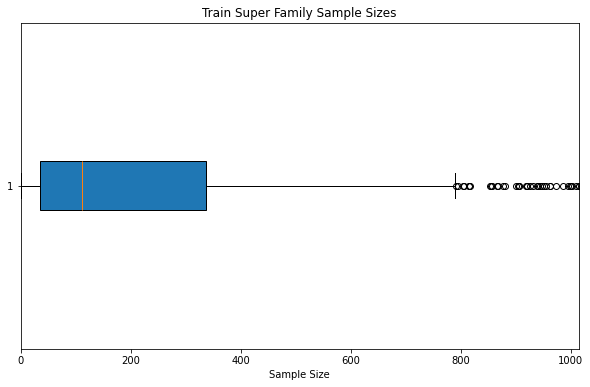

--- Validation Super Family Statistics ---
Mean Sample Size: 3.79
Median Sample Size: 1.00

Top 3 Largest Super Families:
2.60.40.10: 192 samples
1.10.10.10: 157 samples
3.40.50.300: 120 samples

Top 3 Smallest Super Families sample size:
3.40.1500.20: 1 samples
1.20.141.10: 1 samples
2.60.40.2920: 1 samples


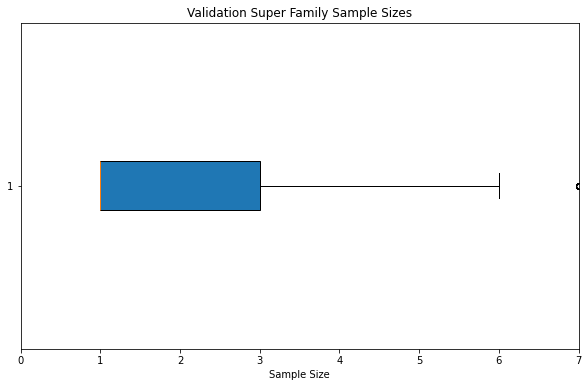

--- Test Super Family Statistics ---
Mean Sample Size: 3.79
Median Sample Size: 1.00

Top 3 Largest Super Families:
2.60.40.10: 192 samples
1.10.10.10: 157 samples
3.40.50.300: 121 samples

Top 3 Smallest Super Families sample size:
3.40.50.12500: 1 samples
3.10.670.10: 1 samples
2.40.128.240: 1 samples


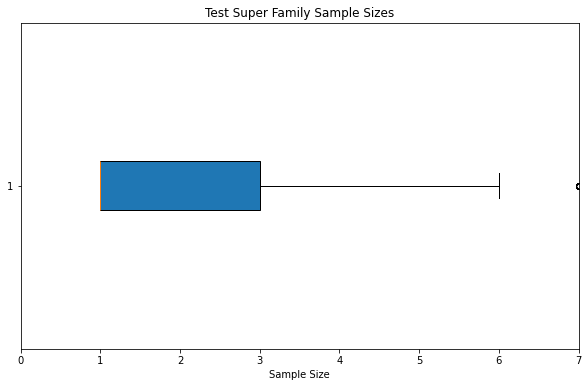

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Function to plot the distribution of super family sample sizes and print statistics
def plot_sf_sample_sizes(y, dataset_name):
    # Count the number of sequences in each super family
    sf_counter = Counter(y)

    # Convert the counter to a list of sample sizes
    sf_sample_sizes = list(sf_counter.values())
    
    # Calculate statistics
    mean_sf = np.mean(sf_sample_sizes)
    median_sf = np.median(sf_sample_sizes)
    sorted_sf = sorted(sf_counter.items(), key=lambda item: item[1], reverse=True)

    top_3_largest_sf = sorted_sf[:3]
    top_3_smallest_sf = sorted_sf[-3:]

    # Print statistics
    print(f'--- {dataset_name} Super Family Statistics ---')
    print(f'Mean Sample Size: {mean_sf:.2f}')
    print(f'Median Sample Size: {median_sf:.2f}')

    print('\nTop 3 Largest Super Families:')
    for sf, size in top_3_largest_sf:
        print(f'{sf}: {size} samples')

    print('\nTop 3 Smallest Super Families sample size:')
    for sf, size in top_3_smallest_sf:
        print(f'{sf}: {size} samples')

    # Create a box plot of the sample sizes with custom whiskers
    plt.figure(figsize=(10, 6))
    
    # 'whis' is set to 1.5 (the typical value) and limit the x-axis to show the smaller SF sizes more clearly
    plt.boxplot(sf_sample_sizes, vert=False, patch_artist=True, whis=1.5)
    
    plt.title(f'{dataset_name} Super Family Sample Sizes')

    # Set xlim to limit extreme outliers and zoom into the smaller sample sizes
    plt.xlim([0, np.percentile(sf_sample_sizes, 90)])  # Show up to the 95th percentile

    plt.xlabel('Sample Size')
    plt.show()

# Example usage (replace y_train, y_val, y_test with your actual data)
plot_sf_sample_sizes(y_train, 'Train')
plot_sf_sample_sizes(y_val, 'Validation')
plot_sf_sample_sizes(y_test, 'Test')


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter
import numpy as np
from tqdm import tqdm
import plotly.io as pio  # To save the figure as a PNG
import os
os.chdir('write here the absolute path to the project root')


# Ensure directories exist
os.makedirs('./data_analysis', exist_ok=True)
os.makedirs('./data_analysis/SF_Boxplots', exist_ok=True)

# Read the Train_ids_for_3Di_usage csv files to get the filtered domains for the different pLDDT thresholds
thresholds = [0, 4, 14, 24, 34, 44, 54, 64, 74, 84]

# Load the full train dataset
df_train = pd.read_csv('./data/Dataset/csv/Train.csv')

# Create a dictionary for each threshold's filtered Domain_ids, to run this code you need the Train_ids_for_3Di_usage_{threshold}.csv files for all thresholds.
# These files are available online, see ReadMe, or they can be generated by ./src/model_building/get_3Di/dataset_filtering_for_3Di_usage.py (if you have 3Di sequences, see ReadMe)
threshold_files = {
    threshold: pd.read_csv(f'./data/Dataset/csv/Train_ids_for_3Di_usage_{threshold}.csv')['Domain_id'] 
    for threshold in thresholds
}

# Function to plot the distribution of super family sample sizes and collect statistics
def plot_sf_sample_sizes_and_collect_stats(df_train_filtered, threshold):
    # Extract 'SF' column as the filtered super family data
    y = df_train_filtered['SF'].tolist()

    # Count the number of sequences in each super family
    sf_counter = Counter(y)
    
    # Convert the counter to a list of sample sizes
    sf_sample_sizes = list(sf_counter.values())

    # Calculate quartiles
    Q1 = np.percentile(sf_sample_sizes, 25)
    Q2 = np.median(sf_sample_sizes)
    Q3 = np.percentile(sf_sample_sizes, 75)

    # Collect stats into a dictionary for the dataframe
    stats = {
        'Threshold': threshold,
        'Mean_Sample_Size': np.mean(sf_sample_sizes),
        'Median_Sample_Size': Q2,
        'Top_3_Largest_SF': sorted(sf_counter.items(), key=lambda item: item[1], reverse=True)[:3],
        'Top_3_Smallest_SF': sorted(sf_counter.items(), key=lambda item: item[1], reverse=True)[-3:]
    }

    # Create the box plot using Plotly
    fig = go.Figure()

    # Create the box plot and show some suspected outliers
    fig.add_trace(go.Box(
        x=sf_sample_sizes, 
        boxpoints='suspectedoutliers',  # show some outliers
        jitter=0.3,  # add some jitter to show the distribution of data points
        pointpos=-1.8,  # position of points relative to the box
        marker_color='blue', 
        name=f'Threshold: {threshold}',
        line=dict(color='blue')
    ))

    # Add title and labels
    fig.update_layout(
        title=f'Train Super Family Sample Sizes (Threshold: {threshold})',
        xaxis_title='Sample Size',
        yaxis_title='Super Families',
        xaxis_range=[0, Q3 + 1.5 * (Q3 - Q1)]  # Zoom into Q1 to Q3 range plus 1.5 IQR
    )

    # Add annotations for the quartiles (shifted lower)
    fig.add_annotation(x=Q1, y=1, text=f'Q1: {Q1:.2f}', showarrow=False, yshift=-115)
    fig.add_annotation(x=Q2, y=1, text=f'Median (Q2): {Q2:.2f}', showarrow=False, yshift=-128)
    fig.add_annotation(x=Q3, y=1, text=f'Q3: {Q3:.2f}', showarrow=False, yshift=-141)

    # Save the plot as a PNG image
    plot_path = f'./data_analysis/SF_Boxplots/train_sf_sample_sizes_thresh_{threshold}.png'
    pio.write_image(fig, plot_path, format='png', scale=2)  # Save with high resolution

    return stats

# Apply this function to each threshold and store results
all_stats = []
for threshold, domain_ids_filtered in tqdm(threshold_files.items(), desc='Processing thresholds'):
    # Filter df_train based on the domain IDs corresponding to the current threshold
    df_train_filtered = df_train[df_train['Unnamed: 0'].isin(domain_ids_filtered)]
    
    # Extract statistics and plot boxplot for the filtered data
    stats = plot_sf_sample_sizes_and_collect_stats(df_train_filtered, threshold)
    
    all_stats.append(stats)

# Convert the list of stats into a dataframe
df_stats = pd.DataFrame(all_stats)

# Save the stats dataframe
df_stats.to_csv('./data_analysis/sf_statistics.csv', index=False)

print('Boxplots saved to ./data_analysis/SF_Boxplots and statistics saved to ./data_analysis/sf_statistics.csv')


Processing thresholds: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

Boxplots saved to ./data_analysis/SF_Boxplots and statistics saved to ./data_analysis/sf_statistics.csv


In [ ]:
from collections import Counter

# Function to count and print the number of super families with a sample size of 1
def count_sf_with_one_sample(y, dataset_name):
    # Count the number of sequences in each super family
    sf_counter = Counter(y)
    
    # Count the number of super families with sample size of 1
    one_sample_sf_count = sum(1 for count in sf_counter.values() if count == 1)
    
    # Print the result
    print(f'Number of Super Families with only 1 sample in {dataset_name}: {one_sample_sf_count}')

# Example usage (replace y_train, y_val, y_test with your actual data)
count_sf_with_one_sample(y_train, 'Train')
count_sf_with_one_sample(y_val, 'Validation')
count_sf_with_one_sample(y_test, 'Test')


Number of Super Families with only 1 sample in Train: 25
Number of Super Families with only 1 sample in Validation: 905
Number of Super Families with only 1 sample in Test: 904


## 3. Sequence identity

### 3.1 Sequence identity inside dataset

#### 3.1.1 Sequence identity inside Test dataset

the next cell is for generating the alignment results, if the result files are already there, no need to run the code in this cell

In [ ]:
# with open('sequences.fasta', 'w') as f:
#    for i, seq in enumerate(AA_sequences_test):
#        f.write(f'>seq{i}\n{seq}\n')

# Write this in terminal 

#Create database 
# mmseqs createdb sequences.fasta sequencesDB

# # Perform search
# mmseqs search sequencesDB sequencesDB resultDB tmp --threads 8

# # Convert results to a tabular format
# mmseqs convertalis sequencesDB sequencesDB resultDB result_test.m8 --format-output 'query,target,pident'

In [ ]:



# Read the MMseqs2 output
df_results = pd.read_csv('result_test.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Remove self-alignments
df_results = df_results[df_results['query'] != df_results['subject']]

# Get minimal identity
max_identity = df_results['identity'].max()
print(f'Max sequence identity, Test set: {max_identity:.2f}%')

# Delete all created files exept 'result_test.m8'



Max sequence identity: 100.00%


#### 3.1.2 Sequence identity inside Validation dataset

the next cell is for generating the alignment results, if the result files are already there, no need to run the code in this cell

In [ ]:
# with open('sequences.fasta', 'w') as f:
#    for i, seq in enumerate(AA_sequences_val):
#        f.write(f'>seq{i}\n{seq}\n')

# Write this in terminal 

#Create database 
# mmseqs createdb sequences.fasta sequencesDB

# # Perform search
# mmseqs search sequencesDB sequencesDB resultDB tmp --threads 8

# # Convert results to a tabular format
# mmseqs convertalis sequencesDB sequencesDB resultDB result_val.m8 --format-output 'query,target,pident'

In [ ]:
# Read the MMseqs2 output
df_results = pd.read_csv('result_val.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Remove self-alignments
df_results = df_results[df_results['query'] != df_results['subject']]

# Get minimal identity
max_identity = df_results['identity'].max()
print(f'Max sequence identity, Validation set: {max_identity:.2f}%')

# Delete all created files exept 'result_val.m8'

Max sequence identity, Validation set: 100.00%


#### 3.1.3 Sequence identity inside Training dataset

the next cell is for generating the alignment results, if the result files are already there, no need to run the code in this cell

In [ ]:
# with open('sequences.fasta', 'w') as f:
#    for i, seq in enumerate(AA_sequences_train):
#        f.write(f'>seq{i}\n{seq}\n')


# Write this in terminal 

#Create database 
# mmseqs createdb sequences.fasta sequencesDB

# # Perform search
# mmseqs search sequencesDB sequencesDB resultDB tmp --threads 8

# # Convert results to a tabular format
# mmseqs convertalis sequencesDB sequencesDB resultDB result_train.m8 --format-output 'query,target,pident'

In [ ]:
# Read the MMseqs2 output
df_results = pd.read_csv('result_train.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Remove self-alignments
df_results = df_results[df_results['query'] != df_results['subject']]

# Get minimal identity
max_identity = df_results['identity'].max()
print(f'Max sequence identity, Training set: {max_identity:.2f}%')

# Delete all created files exept 'result_train.m8'

Max sequence identity, Training set: 100.00%


Print the similar sequences

In [ ]:
# Create a pandas Series from the sequences
sequences_series = pd.Series(AA_sequences_train)

# Find duplicate sequences
duplicates = sequences_series[sequences_series.duplicated(keep=False)]

# Print results
if not duplicates.empty:
    print(f'There are {len(duplicates)} duplicate sequences in the dataset.')
    print('Here are the duplicate sequences:')
    print(duplicates)
else:
    print('There are no duplicate sequences in the dataset.')


There are 433 duplicate sequences in the dataset.
Here are the duplicate sequences:
592           KIKLLFQTGF
668          IDRRGFTIHWI
1695        TRALNVSSYNYL
1709       TTKVLNFGSYNYL
1710        TRALNISSYNYL
               ...      
1006343       LGILVRSKDT
1014484       VIFDMDGVMI
1014485       VIFDMDGVMI
1018354    TTKVLNFGSYNYL
1023005       LGILVRTRDT
Length: 433, dtype: object


### 3.2 Sequence identity between datasets

#### 3.2.1 Sequence identity between test and val

In [ ]:
# with open('sequences_val.fasta', 'w') as f:
#     for i, seq in enumerate(AA_sequences_val):
#         f.write(f'>val_seq{i}\n{seq}\n')

# with open('sequences_test.fasta', 'w') as f:
#     for i, seq in enumerate(AA_sequences_test):
#         f.write(f'>test_seq{i}\n{seq}\n')

# # Run MMseqs2 commands
# # Create databases
# subprocess.run(['mmseqs', 'createdb', 'sequences_val.fasta', 'valDB'])
# subprocess.run(['mmseqs', 'createdb', 'sequences_test.fasta', 'testDB'])

# # Perform search (validation set against test set)
# subprocess.run(['mmseqs', 'search', 'valDB', 'testDB', 'resultDB', 'tmp', '--threads', '8'])

# # Convert results to a tabular format
# subprocess.run(['mmseqs', 'convertalis', 'valDB', 'testDB', 'resultDB', 'result_val_vs_test.m8', '--format-output', 'query,target,pident'])

In [ ]:
# Parse the MMseqs2 output
df_results = pd.read_csv('result_val_vs_test.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Get maximum identity
max_identity = df_results['identity'].max()
print(f'Maximum sequence identity between Validation and Test sets: {max_identity:.2f}%')


Maximum sequence identity between Validation and Test sets: 100.00%


In [ ]:
# # Delete all created files except for the result file ()
# files_to_delete = ['sequences_val.fasta', 'sequences_test.fasta', 'valDB', 'testDB', 'resultDB', 'tmp']
# for file in files_to_delete:
#     for path in glob.glob(file + '*'):
#         try:
#             if os.path.isdir(path):
#                 shutil.rmtree(path)
#             else:
#                 os.remove(path)
#         except Exception as e:
#             print(f'Error deleting {path}: {e}')

#### 3.2.2 Sequence identity between train and test 

In [ ]:
with open('sequences_train.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_train):
        f.write(f'>train_seq{i}\n{seq}\n')

with open('sequences_test.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_test):
        f.write(f'>test_seq{i}\n{seq}\n')

# # Create databases
# mmseqs createdb sequences_train.fasta trainDB
# mmseqs createdb sequences_test.fasta testDB

# # Perform search (training set against test set)
# mmseqs search trainDB testDB resultDB_train_vs_test tmp_train_vs_test --threads 8

# # Convert results to a tabular format
# mmseqs convertalis trainDB testDB resultDB_train_vs_test result_train_vs_test.m8 --format-output query,target,pident


In [ ]:
# Parse the MMseqs2 output
df_results = pd.read_csv('result_train_vs_test.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Get maximum identity
max_identity = df_results['identity'].max()
print(f'Maximum sequence identity between Training and Test sets: {max_identity:.2f}%')

# Delete all created files except for the result file
files_to_delete = ['sequences_train.fasta', 'sequences_test.fasta', 'trainDB', 'testDB', 'resultDB_train_vs_test', 'tmp_train_vs_test']
for file in files_to_delete:
    for path in glob.glob(file + '*'):
        try:
            if os.path.isdir(path):
                shutil.rmtree(path)
            else:
                os.remove(path)
        except Exception as e:
            print(f'Error deleting {path}: {e}')

Maximum sequence identity between Training and Test sets: 100.00%


inversing the query and the subject datasets for identity check


In [ ]:
# Create FASTA files for test and training sets
with open('sequences_test.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_test):
        f.write(f'>test_seq{i}\n{seq}\n')

with open('sequences_train.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_train):
        f.write(f'>train_seq{i}\n{seq}\n')

# # Create databases
# mmseqs createdb sequences_test.fasta testDB
# mmseqs createdb sequences_train.fasta trainDB

# # Perform search (test set against training set)
# mmseqs search testDB trainDB resultDB_test_vs_train tmp_test_vs_train --threads 8

# # Convert results to a tabular format
# mmseqs convertalis testDB trainDB resultDB_test_vs_train result_test_vs_train.m8 --format-output query,target,pident

In [ ]:
# Parse the MMseqs2 output
df_results = pd.read_csv('result_test_vs_train.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Get maximum identity
max_identity = df_results['identity'].max()
print(f'Maximum sequence identity between Test and Training sets: {max_identity:.2f}%')

# Delete all created files except for the result file
files_to_delete = [
    'sequences_test.fasta', 'sequences_train.fasta',
    'testDB', 'trainDB', 'resultDB_test_vs_train', 'tmp_test_vs_train',
    'testDB_h', 'trainDB_h', 'resultDB_test_vs_train_h'
]
for file in files_to_delete:
    for path in glob.glob(file + '*'):
        try:
            if os.path.isdir(path):
                shutil.rmtree(path)
            else:
                os.remove(path)
        except Exception as e:
            print(f'Error deleting {path}: {e}')


Maximum sequence identity between Test and Training sets: 84.10%


Print the similar sequences from train to test

In [ ]:
import pandas as pd
from Bio import SeqIO

# Function to parse FASTA files
def parse_fasta(file_path):
    sequences = {}
    for record in SeqIO.parse(file_path, 'fasta'):
        sequences[record.id] = str(record.seq)
    return sequences

# Parse the FASTA files
train_sequences = parse_fasta('sequences_train.fasta')
test_sequences = parse_fasta('sequences_test.fasta')

# Read the MMseqs2 output
df_results = pd.read_csv('result_train_vs_test.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Define a threshold for identity to consider sequences as identical (e.g., 100% identity)
identity_threshold = 100.0

# Filter results to find sequences with identity above the threshold
common_sequences = df_results[df_results['identity'] >= identity_threshold].copy()

# Retrieve the actual sequences using .loc to avoid SettingWithCopyWarning
common_sequences.loc[:, 'query_sequence'] = common_sequences['query'].map(train_sequences)
common_sequences.loc[:, 'subject_sequence'] = common_sequences['subject'].map(test_sequences)

# Print the common sequences
print(f'Total identical sequences found: {len(common_sequences)}')
for index, row in common_sequences.iterrows():
    print(f'Query: {row['query']} | Full Query Sequence: {row['query_sequence']}')
    print(f'Subject: {row['subject']} | Full Subject Sequence: {row['subject_sequence']}\n')



Total common sequences found: 4
Query: train_seq365338 | Full Query Sequence: GRLYLEWINKKTVK
Subject: test_seq5393 | Full Subject Sequence: GRLYLEWINKKTIKNSAIVLKQEIDVVFQENETMVLAVDNIRGLQLIAGKTGQIDYLPEAQVSCCCLSPHLEYVAFGDEDGAIKIIELPNNRVFSSGVGHKKAVRHIQFTADGKTLISSSEDSVIQVWNWQTGDYVFLQAHQETVKDFRLLQDSRLLSWSFDGTVKVWNVITGRIERDFTCHQGTVLSCAISSDATKFSSTSADKTAKIWSFDLLSPLHELKGHNGCVRCSAFSLDGILLATGDDNGEIRIWNVSDGQLLHSCAPISVEEGTATHGGWVTDVCFSPDSKTLVSAGGYLKWWNVATGDSSQTFYTNGTNLKKIHVSPDFRTYVTVDNLGILYILQVLE

Query: train_seq137961 | Full Query Sequence: LYLEWINKKTIK
Subject: test_seq5393 | Full Subject Sequence: GRLYLEWINKKTIKNSAIVLKQEIDVVFQENETMVLAVDNIRGLQLIAGKTGQIDYLPEAQVSCCCLSPHLEYVAFGDEDGAIKIIELPNNRVFSSGVGHKKAVRHIQFTADGKTLISSSEDSVIQVWNWQTGDYVFLQAHQETVKDFRLLQDSRLLSWSFDGTVKVWNVITGRIERDFTCHQGTVLSCAISSDATKFSSTSADKTAKIWSFDLLSPLHELKGHNGCVRCSAFSLDGILLATGDDNGEIRIWNVSDGQLLHSCAPISVEEGTATHGGWVTDVCFSPDSKTLVSAGGYLKWWNVATGDSSQTFYTNGTNLKKIHVSPDFRTYVTVDNLGILYILQVLE

Query: train_seq799078 | Full Query Sequence: SGQEEGAYGW

#### 3.2.3 Sequence identity between train and val

In [ ]:
# Step 1: Create FASTA files for training and validation sets
with open('sequences_train.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_train):
        f.write(f'>train_seq{i}\n{seq}\n')

with open('sequences_val.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_val):
        f.write(f'>val_seq{i}\n{seq}\n')

# Commands to be run in the shell:
# mmseqs createdb sequences_train.fasta trainDB
# mmseqs createdb sequences_val.fasta valDB

# Perform search (validation set against training set)
# mmseqs search valDB trainDB resultDB_val_vs_train tmp_val_vs_train --threads 8

# Convert results to a tabular format
# mmseqs convertalis valDB trainDB resultDB_val_vs_train result_val_vs_train.m8 --format-output query,target,pident

# Perform search (training set against validation set)
# mmseqs search trainDB valDB resultDB_train_vs_val tmp_train_vs_val --threads 8

# Convert results to a tabular format
# mmseqs convertalis trainDB valDB resultDB_train_vs_val result_train_vs_val.m8 --format-output query,target,pident

In [ ]:
# Step 3: Parse the MMseqs2 output
df_results_val_vs_train = pd.read_csv('result_val_vs_train.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])
df_results_train_vs_val = pd.read_csv('result_train_vs_val.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Get maximum identity for val vs train
max_identity_val_vs_train = df_results_val_vs_train['identity'].max()
print(f'Maximum sequence identity between Validation and Training sets: {max_identity_val_vs_train:.2f}%')

# Get maximum identity for train vs val
max_identity_train_vs_val = df_results_train_vs_val['identity'].max()
print(f'Maximum sequence identity between Training and Validation sets: {max_identity_train_vs_val:.2f}%')

# Step 4: Delete all created files except for the result files
files_to_delete = [
    'sequences_train.fasta', 'sequences_val.fasta',
    'trainDB', 'valDB', 'resultDB_val_vs_train', 'tmp_val_vs_train',
    'trainDB_h', 'valDB_h', 'resultDB_val_vs_train_h',
    'resultDB_train_vs_val', 'tmp_train_vs_val', 'resultDB_train_vs_val_h'
]
for file in files_to_delete:
    for path in glob.glob(file + '*'):
        try:
            if os.path.isdir(path):
                shutil.rmtree(path)
            else:
                os.remove(path)
        except Exception as e:
            print(f'Error deleting {path}: {e}')


Maximum sequence identity between Validation and Training sets: 100.00%
Maximum sequence identity between Training and Validation sets: 100.00%


In [ ]:

# Step 1: Create FASTA files for validation and test sets
with open('sequences_val.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_val):
        f.write(f'>val_seq{i}\n{seq}\n')

with open('sequences_train.fasta', 'w') as f:
    for i, seq in enumerate(AA_sequences_train):
        f.write(f'>test_seq{i}\n{seq}\n')

# Commands to be run in the shell:
# mmseqs createdb sequences_val.fasta valDB
# mmseqs createdb sequences_test.fasta testDB

# Perform search (validation set against test set)
# mmseqs search valDB testDB resultDB_val_vs_test tmp_val_vs_test --threads 8

# Convert results to a tabular format
# mmseqs convertalis valDB testDB resultDB_val_vs_test result_val_vs_test.m8 --format-output query,target,pident

In [ ]:
import pandas as pd
from Bio import SeqIO

# Function to parse FASTA files
def parse_fasta(file_path):
    sequences = {}
    for record in SeqIO.parse(file_path, 'fasta'):
        sequences[record.id] = str(record.seq)
    return sequences

# Parse the FASTA files
train_sequences = parse_fasta('sequences_train.fasta')
val_sequences = parse_fasta('sequences_val.fasta')

# Read the MMseqs2 output
df_results = pd.read_csv('result_train_vs_val.m8', sep='\t', header=None, names=['query', 'subject', 'identity'])

# Define a threshold for identity to consider sequences as identical (e.g., 100% identity)
identity_threshold = 100.0

# Filter results to find sequences with identity above the threshold
common_sequences = df_results[df_results['identity'] >= identity_threshold].copy()

# Retrieve the actual sequences using .loc to avoid SettingWithCopyWarning
common_sequences.loc[:, 'query_sequence'] = common_sequences['query'].map(train_sequences)
common_sequences.loc[:, 'subject_sequence'] = common_sequences['subject'].map(val_sequences)

# Print the common sequences
print(f'Total identical sequences found: {len(common_sequences)}')
for index, row in common_sequences.iterrows():
    print(f'Query: {row['query']} | Full Query Sequence: {row['query_sequence']}')
    print(f'Subject: {row['subject']} | Full Subject Sequence: {row['subject_sequence']}\n')


Total identical sequences found: 436
Query: train_seq288646 | Full Query Sequence: nan
Subject: val_seq2995 | Full Subject Sequence: KPYACPECGKSFSQLAHLRAHQRTHTGE

Query: train_seq859110 | Full Query Sequence: nan
Subject: val_seq4476 | Full Subject Sequence: IGIHEHASIDLPGIKGLWPLRSDPNRETDDTLVLSFVGQTRVLMLNGEEVEETELMGFVDDQQTFFCGNVAHQQLIQITSASVRLVSQEPKALVSEWKEPQAKNISVASCNSSQVVVAVGRALYYLQIHPQELRQISHTEMEHEVACLDITPLGDSNGLSPLCAIGLWTDISARILKLPSFELLHKEMLGGEIIPRSILMTTFESSHYLLCALGDGALFYFGLNIETGLLSDRKKVTLGTQPTVLRTFRSLSTTNVFACSDRPTVIYSSNHKLVFSNVNLKEVNYMCPLNSDGYPDSLALANNSTLTIGTIDEIQK

Query: train_seq296200 | Full Query Sequence: nan
Subject: val_seq5127 | Full Subject Sequence: MATNWGSLLQDKQQLEELARQAVDRALAEGVLLRTSQEPTSSEVVSYAPFTLFPSRTPAVHRHVLSVLSKTKEAGKIFENCLLRPGSPA

Query: train_seq559605 | Full Query Sequence: nan
Subject: val_seq4070 | Full Subject Sequence: LSSHNDYVQLMQALRQQMPSLRQTEKVVFMGHGASHHAFAAYACLDHMMTAQRFPARVGAVESYPEVDILIDSLRDEGVTGVHLMPLMLVAGDHAINDMASDDGDSWKMRFNAAGIPATPWLS

Query: train_se

## 4. pLDDT


### 4.1 pLDDT distribution

Q1: 70.91
Q2: 81.98
Q3: 88.73
Lower Tail Limit: 44.179999999999986
Upper Tail Limit: 115.46000000000001


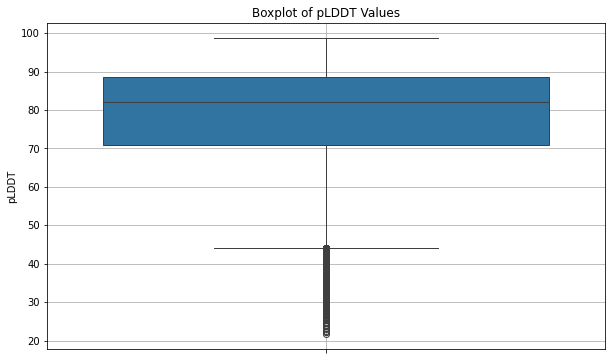

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('write here the absolute path to the project root')

# Load the Train_pLDDT.csv file
df_plddt = pd.read_csv('./data/Dataset/csv/Train_pLDDT.csv')

# Create a boxplot of the pLDDTs
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_plddt['pLDDT'])
plt.title('Boxplot of pLDDT Values')
plt.ylabel('pLDDT')
plt.grid(True)

# Calculate the quartiles
q1 = df_plddt['pLDDT'].quantile(0.25)
q2 = df_plddt['pLDDT'].quantile(0.5)
q3 = df_plddt['pLDDT'].quantile(0.75)

# Print the quartiles
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')

# Calculate the tail limits
lower_tail_limit = q1 - 1.5 * (q3 - q1)
upper_tail_limit = q3 + 1.5 * (q3 - q1)

# Print the tail limits
print(f'Lower Tail Limit: {lower_tail_limit}')
print(f'Upper Tail Limit: {upper_tail_limit}')

# Show the plot
plt.show()


### 4.2 pLDDT filtering tests

In [ ]:
import pandas as pd

import os
os.chdir('write here the absolute path to the project root')

# To run this code you need the Train_ids_for_3Di_usage_{threshold}.csv,  Test_ids_for_3Di_usage_{threshold}.csv and Val_ids_for_3Di_usage_{threshold}.csv files for all thresholds.
# These files are available online, see ReadMe, or they can be generated by ./src/model_building/get_3Di/dataset_filtering_for_3Di_usage.py (if you have 3Di sequences, see ReadMe)

# Read the Train_ids_for_3Di_usage csv files to get the filtered domains for the different pLDDT thresholds
df_train_threshold_0_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_0.csv')
domain_ids_thresh_0_train = df_train_threshold_0_ids['Domain_id']

df_train_thrshold_4_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_4.csv')
domain_ids_thresh_4_train = df_train_thrshold_4_ids['Domain_id']

df_train_threshold_14_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_14.csv')
domain_ids_thresh_14_train = df_train_threshold_14_ids['Domain_id']

df_train_threshold_24_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_24.csv')
domain_ids_thresh_24_train = df_train_threshold_24_ids['Domain_id']

df_train_threshold_34_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_34.csv')
domain_ids_thresh_34_train = df_train_threshold_34_ids['Domain_id']

df_train_threshold_44_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_44.csv')
domain_ids_thresh_44_train = df_train_threshold_44_ids['Domain_id']

df_train_threshold_54_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_54.csv')
domain_ids_thresh_54_train = df_train_threshold_54_ids['Domain_id']

df_train_threshold_64_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_64.csv')
domain_ids_thresh_64_train = df_train_threshold_64_ids['Domain_id']

df_train_threshold_74_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_74.csv')
domain_ids_thresh_74_train = df_train_threshold_74_ids['Domain_id']

df_train_threshold_84_ids = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_84.csv')
domain_ids_thresh_84_train = df_train_threshold_84_ids['Domain_id']

df_test_threshold_0_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_0.csv')
domain_ids_thresh_0_test = df_test_threshold_0_ids['Domain_id']

df_test_thrshold_4_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_4.csv')
domain_ids_thresh_4_test = df_test_thrshold_4_ids['Domain_id']

df_test_threshold_14_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_14.csv')
domain_ids_thresh_14_test = df_test_threshold_14_ids['Domain_id']

df_test_threshold_24_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_24.csv')
domain_ids_thresh_24_test = df_test_threshold_24_ids['Domain_id']

df_test_threshold_34_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_34.csv')
domain_ids_thresh_34_test = df_test_threshold_34_ids['Domain_id']

df_test_threshold_44_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_44.csv')
domain_ids_thresh_44_test = df_test_threshold_44_ids['Domain_id']

df_test_threshold_54_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_54.csv')
domain_ids_thresh_54_test = df_test_threshold_54_ids['Domain_id']

df_test_threshold_64_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_64.csv')
domain_ids_thresh_64_test = df_test_threshold_64_ids['Domain_id']

df_test_threshold_74_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_74.csv')
domain_ids_thresh_74_test = df_test_threshold_74_ids['Domain_id']

df_test_threshold_84_ids = pd.read_csv('./data/Dataset/csv/Test_ids_for_3Di_usage_84.csv')
domain_ids_thresh_84_test = df_test_threshold_84_ids['Domain_id']

df_val_threshold_0_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_0.csv')
domain_ids_thresh_0_val = df_val_threshold_0_ids['Domain_id']

df_val_thrshold_4_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_4.csv')
domain_ids_thresh_4_val = df_val_thrshold_4_ids['Domain_id']

df_val_threshold_14_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_14.csv')
domain_ids_thresh_14_val = df_val_threshold_14_ids['Domain_id']

df_val_threshold_24_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_24.csv')
domain_ids_thresh_24_val = df_val_threshold_24_ids['Domain_id']

df_val_threshold_34_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_34.csv')
domain_ids_thresh_34_val = df_val_threshold_34_ids['Domain_id']

df_val_threshold_44_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_44.csv')
domain_ids_thresh_44_val = df_val_threshold_44_ids['Domain_id']

df_val_threshold_54_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_54.csv')
domain_ids_thresh_54_val = df_val_threshold_54_ids['Domain_id']

df_val_threshold_64_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_64.csv')
domain_ids_thresh_64_val = df_val_threshold_64_ids['Domain_id']

df_val_threshold_74_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_74.csv')
domain_ids_thresh_74_val = df_val_threshold_74_ids['Domain_id']

df_val_threshold_84_ids = pd.read_csv('./data/Dataset/csv/Val_ids_for_3Di_usage_84.csv')
domain_ids_thresh_84_val = df_val_threshold_84_ids['Domain_id']

def Number_of_sf_for_threshold(domain_ids, threshold, csv_path, dataset_name):
    # Read the Train.csv file
    df = pd.read_csv(csv_path)
    
    # Filter the dataframe to get the rows where the 'Unnamed: 0' column matches the domain_ids
    filtered_df = df[df['Unnamed: 0'].isin(domain_ids)].drop_duplicates(subset=['SF'])

    print(f'Nb unique SF in {dataset_name} for threshold {threshold}%: {len(filtered_df)}, {1772-len(filtered_df)} lost')
    
    # Return the corresponding values in the 'SF' column
    return filtered_df['SF'].tolist()


In [ ]:

# Train:
csv_path_train = './data/Dataset/csv/Train.csv'
print('Train:')
sf_thresh_0 = Number_of_sf_for_threshold(domain_ids_thresh_0_train,0, csv_path_train, 'Train')
sf_thresh_4 = Number_of_sf_for_threshold(domain_ids_thresh_4_train,4, csv_path_train, 'Train')
sf_thresh_14 = Number_of_sf_for_threshold(domain_ids_thresh_14_train,14, csv_path_train, 'Train')
sf_thresh_24 = Number_of_sf_for_threshold(domain_ids_thresh_24_train,24, csv_path_train, 'Train')
sf_thresh_34 = Number_of_sf_for_threshold(domain_ids_thresh_34_train,34, csv_path_train, 'Train')
sf_thresh_44 = Number_of_sf_for_threshold(domain_ids_thresh_44_train,44, csv_path_train, 'Train')
sf_thresh_54 = Number_of_sf_for_threshold(domain_ids_thresh_54_train,54, csv_path_train, 'Train')
sf_thresh_64 = Number_of_sf_for_threshold(domain_ids_thresh_64_train,64, csv_path_train, 'Train')
sf_thresh_74 = Number_of_sf_for_threshold(domain_ids_thresh_74_train,74, csv_path_train, 'Train')
sf_thresh_84 = Number_of_sf_for_threshold(domain_ids_thresh_84_train,84, csv_path_train, 'Train')


Train:
Nb unique SF in Train for threshold 0%: 1740, 32 lost
Nb unique SF in Train for threshold 4%: 1740, 32 lost
Nb unique SF in Train for threshold 14%: 1740, 32 lost
Nb unique SF in Train for threshold 24%: 1740, 32 lost
Nb unique SF in Train for threshold 34%: 1739, 33 lost
Nb unique SF in Train for threshold 44%: 1739, 33 lost
Nb unique SF in Train for threshold 54%: 1738, 34 lost
Nb unique SF in Train for threshold 64%: 1736, 36 lost
Nb unique SF in Train for threshold 74%: 1718, 54 lost
Nb unique SF in Train for threshold 84%: 1647, 125 lost


In [ ]:
# Test:
csv_path_test = './data/Dataset/csv/Test.csv'
print('Test:')
sf_thresh_0 = Number_of_sf_for_threshold(domain_ids_thresh_0_test,0, csv_path_test, 'Test')
sf_thresh_4 = Number_of_sf_for_threshold(domain_ids_thresh_4_test,4, csv_path_test, 'Test')
sf_thresh_14 = Number_of_sf_for_threshold(domain_ids_thresh_14_test,14, csv_path_test, 'Test')
sf_thresh_24 = Number_of_sf_for_threshold(domain_ids_thresh_24_test,24, csv_path_test, 'Test')
sf_thresh_34 = Number_of_sf_for_threshold(domain_ids_thresh_34_test,34, csv_path_test, 'Test')
sf_thresh_44 = Number_of_sf_for_threshold(domain_ids_thresh_44_test,44, csv_path_test, 'Test')
sf_thresh_54 = Number_of_sf_for_threshold(domain_ids_thresh_54_test,54, csv_path_test, 'Test')
sf_thresh_64 = Number_of_sf_for_threshold(domain_ids_thresh_64_test,64, csv_path_test, 'Test')
sf_thresh_74 = Number_of_sf_for_threshold(domain_ids_thresh_74_test,74, csv_path_test, 'Test')
sf_thresh_84 = Number_of_sf_for_threshold(domain_ids_thresh_84_test,84, csv_path_test, 'Test')



Test:
Nb unique SF in Test for threshold 0%: 1740
Nb unique SF in Test for threshold 4%: 1740
Nb unique SF in Test for threshold 14%: 1740
Nb unique SF in Test for threshold 24%: 1740
Nb unique SF in Test for threshold 34%: 1739
Nb unique SF in Test for threshold 44%: 1739
Nb unique SF in Test for threshold 54%: 1738
Nb unique SF in Test for threshold 64%: 1736
Nb unique SF in Test for threshold 74%: 1718
Nb unique SF in Test for threshold 84%: 1647


In [ ]:
# Val:
csv_path_val = './data/Dataset/csv/Val.csv'
print('Val:')
sf_thresh_0 = Number_of_sf_for_threshold(domain_ids_thresh_0_val,0, csv_path_val, 'Val')
sf_thresh_4 = Number_of_sf_for_threshold(domain_ids_thresh_4_val,4, csv_path_val, 'Val')
sf_thresh_14 = Number_of_sf_for_threshold(domain_ids_thresh_14_val,14, csv_path_val, 'Val')
sf_thresh_24 = Number_of_sf_for_threshold(domain_ids_thresh_24_val,24, csv_path_val, 'Val')
sf_thresh_34 = Number_of_sf_for_threshold(domain_ids_thresh_34_val,34, csv_path_val, 'Val')
sf_thresh_44 = Number_of_sf_for_threshold(domain_ids_thresh_44_val,44, csv_path_val, 'Val')
sf_thresh_54 = Number_of_sf_for_threshold(domain_ids_thresh_54_val,54, csv_path_val, 'Val')
sf_thresh_64 = Number_of_sf_for_threshold(domain_ids_thresh_64_val,64, csv_path_val, 'Val')
sf_thresh_74 = Number_of_sf_for_threshold(domain_ids_thresh_74_val,74, csv_path_val, 'Val')
sf_thresh_84 = Number_of_sf_for_threshold(domain_ids_thresh_84_val,84, csv_path_val, 'Val')



Val:
Nb unique SF in Val for threshold 0%: 1740
Nb unique SF in Val for threshold 4%: 1740
Nb unique SF in Val for threshold 14%: 1740
Nb unique SF in Val for threshold 24%: 1740
Nb unique SF in Val for threshold 34%: 1739
Nb unique SF in Val for threshold 44%: 1739
Nb unique SF in Val for threshold 54%: 1738
Nb unique SF in Val for threshold 64%: 1736
Nb unique SF in Val for threshold 74%: 1718
Nb unique SF in Val for threshold 84%: 1647


In [ ]:
def check_lost_sf_in_test_or_val(threshold_sf_train, threshold_sf_test, threshold_sf_val, threshold):
    # Identify lost SFs in the Train dataset for the given threshold
    lost_sf_train = set(sf_thresh_0_train).difference(set(threshold_sf_train))
    
    # Check if lost SFs are in the filtered Test or Val dataset for the same threshold
    lost_sf_in_test = lost_sf_train.intersection(set(threshold_sf_test))
    lost_sf_in_val = lost_sf_train.intersection(set(threshold_sf_val))

    print(f'Lost SFs in Train for threshold {threshold}%: {len(lost_sf_train)}')
    print(f'Lost SFs found in Test for threshold {threshold}%: {len(lost_sf_in_test)}')
    print(f'Lost SFs found in Val for threshold {threshold}%: {len(lost_sf_in_val)}')
    return lost_sf_train, lost_sf_in_test, lost_sf_in_val


# Calculate the SFs for Train at threshold 0
csv_path_train = './data/Dataset/csv/Train.csv'
sf_thresh_0_train = Number_of_sf_for_threshold(domain_ids_thresh_0_train, 0, csv_path_train, 'Train')

# Calculate the SFs for Test and Val at threshold 0
csv_path_test = './data/Dataset/csv/Test.csv'
sf_thresh_0_test = Number_of_sf_for_threshold(domain_ids_thresh_0_test, 0, csv_path_test, 'Test')

csv_path_val = './data/Dataset/csv/Val.csv'
sf_thresh_0_val = Number_of_sf_for_threshold(domain_ids_thresh_0_val, 0, csv_path_val, 'Val')

# Check lost SFs for each threshold and whether they are found in filtered Test or Val datasets for that threshold
thresholds = [4, 14, 24, 34, 44, 54, 64, 74, 84]
for threshold, domain_ids_train, domain_ids_test, domain_ids_val in zip(
    thresholds, 
    [domain_ids_thresh_4_train, domain_ids_thresh_14_train, domain_ids_thresh_24_train, 
     domain_ids_thresh_34_train, domain_ids_thresh_44_train, domain_ids_thresh_54_train, 
     domain_ids_thresh_64_train, domain_ids_thresh_74_train, domain_ids_thresh_84_train],
    [domain_ids_thresh_4_test, domain_ids_thresh_14_test, domain_ids_thresh_24_test, 
     domain_ids_thresh_34_test, domain_ids_thresh_44_test, domain_ids_thresh_54_test, 
     domain_ids_thresh_64_test, domain_ids_thresh_74_test, domain_ids_thresh_84_test],
    [domain_ids_thresh_4_val, domain_ids_thresh_14_val, domain_ids_thresh_24_val, 
     domain_ids_thresh_34_val, domain_ids_thresh_44_val, domain_ids_thresh_54_val, 
     domain_ids_thresh_64_val, domain_ids_thresh_74_val, domain_ids_thresh_84_val]):
    
    # Calculate SFs for Train, Test, and Val datasets at the current threshold
    sf_for_threshold_train = Number_of_sf_for_threshold(domain_ids_train, threshold, csv_path_train, f'Train (Threshold {threshold}%)')
    sf_for_threshold_test = Number_of_sf_for_threshold(domain_ids_test, threshold, csv_path_test, f'Test (Threshold {threshold}%)')
    sf_for_threshold_val = Number_of_sf_for_threshold(domain_ids_val, threshold, csv_path_val, f'Val (Threshold {threshold}%)')
    
    # Check lost SFs in Train and their presence in Test and Val for the same threshold
    lost_sf_train, sf_in_test, sf_in_val = check_lost_sf_in_test_or_val(
        sf_for_threshold_train, 
        sf_for_threshold_test, 
        sf_for_threshold_val, 
        threshold
    )


Nb unique SF in Train for threshold 0%: 1740
Nb unique SF in Test for threshold 0%: 1740
Nb unique SF in Val for threshold 0%: 1740
Nb unique SF in Train (Threshold 4%) for threshold 4%: 1740
Nb unique SF in Test (Threshold 4%) for threshold 4%: 1740
Nb unique SF in Val (Threshold 4%) for threshold 4%: 1740
Lost SFs in Train for threshold 4%: 0
Lost SFs found in Test for threshold 4%: 0
Lost SFs found in Val for threshold 4%: 0
Nb unique SF in Train (Threshold 14%) for threshold 14%: 1740
Nb unique SF in Test (Threshold 14%) for threshold 14%: 1740
Nb unique SF in Val (Threshold 14%) for threshold 14%: 1740
Lost SFs in Train for threshold 14%: 0
Lost SFs found in Test for threshold 14%: 0
Lost SFs found in Val for threshold 14%: 0
Nb unique SF in Train (Threshold 24%) for threshold 24%: 1740
Nb unique SF in Test (Threshold 24%) for threshold 24%: 1740
Nb unique SF in Val (Threshold 24%) for threshold 24%: 1740
Lost SFs in Train for threshold 24%: 0
Lost SFs found in Test for threshold 

## 5. F1 score by SF and Training dataset support

### 5.1 Global view of F1 score

#### 5.1.1 Support distribution

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import os
os.chdir('write here the absolute path to the project root')


# Ensure the directory exists
os.makedirs('./data_analysis/SF_F1_score', exist_ok=True)

# Load the classification report CSV
best_model_classif_report_path = './results/classification_report/CR_ANN_ProstT5_full_2_blocks_dropout_0.3_layer_size_2048_pLDDT_24_support_threshold_0_AA+3Di.csv'
df = pd.read_csv(best_model_classif_report_path)

# Support distribution

# Exclude rows corresponding to 'accuracy', 'macro avg', and 'weighted avg' by filtering the index or specific rows
df_filtered = df.iloc[:-3]

# Extract the support values, excluding any rows where 'support' might be NaN
df_support = df_filtered.dropna(subset=['support'])  # Drop rows where 'support' is NaN (for global metrics like accuracy)
support_values = df_support['support']

# Create the box plot
fig = go.Figure()

# Add box trace for support values
fig.add_trace(go.Box(
    x=support_values, 
    boxpoints='outliers',  # show the outliers
    marker_color='blue',   # set color for the boxplot
    name='Support Distribution'
))

# Add title and axis labels
fig.update_layout(
    title='Support Distribution of Super Families',
    xaxis_title='Support Values',
    yaxis_title='Super Families',
)

# Save the boxplot as a PNG image
plot_path = './data_analysis/SF_Boxplots/SF_support_distribution.png'
pio.write_image(fig, plot_path, format='png', scale=2)  # Save with high resolution

print(f'Boxplot saved to {plot_path}')

# Calculate 1st quartile (Q1), 3rd quartile (Q3), mean, and median
Q1 = np.percentile(support_values, 25)
Q3 = np.percentile(support_values, 75)
mean_value = np.mean(support_values)
median_value = np.median(support_values)

# Print the calculated statistics
print(f'First Quartile (Q1): {Q1}')
print(f'Third Quartile (Q3): {Q3}')
print(f'Mean: {mean_value}')
print(f'Median: {median_value}')


Boxplot saved to ./data_analysis/SF_Boxplots/SF_support_distribution.png
First Quartile (Q1): 1.0
Third Quartile (Q3): 3.0
Mean: 3.8384128809660725
Median: 1.0


#### 5.1.2 Simple F1 score graphe

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import os

def plot_f1_scores_by_sf(pLDDT_threshold):
    '''
    Function to plot F1 scores by Super Families (SF) 
    based on the provided pLDDT threshold.
    '''

    # Set working directory
    os.chdir('write here the absolute path to the project root')

    # Ensure the directory exists
    os.makedirs('./data_analysis/SF_F1_score', exist_ok=True)

    # Load the classification report CSV
    best_model_classif_report_path = f'./results/classification_report/CR_ANN_ProstT5_full_2_blocks_dropout_0.3_layer_size_2048_pLDDT_{pLDDT_threshold}_AA+3Di.csv'
    df = pd.read_csv(best_model_classif_report_path)

    # Exclude rows corresponding to 'accuracy', 'macro avg', and 'weighted avg'
    df = df.iloc[:-3]

    # Sort the dataframe by the 'f1-score' values
    df_sorted = df.sort_values(by='f1-score', ascending=False)

    # Create the bar chart with wider bars and improved color visibility
    fig = go.Figure(go.Bar(
        x=df_sorted.index.astype(str),  # Converting index to string for labels
        y=df_sorted['f1-score'],
        text=df_sorted['f1-score'].round(2),
        textposition='auto',
        marker_color='rgba(0, 102, 204, 0.7)',  # A semi-transparent blue for better contrast
        marker_line_color='rgba(0, 0, 153, 0.9)',  # Dark blue border for the bars
        marker_line_width=1.5,  # Width of the border
        width=0.6  # Adjust the width of the bars for more spacing
    ))

    # Add title and labels
    fig.update_layout(
        title=f'F1 Scores - pLDDT {pLDDT_threshold}',
        xaxis_title='Super Families',
        yaxis_title='F1-Score',
        bargap=0.2,  # Add gap between bars to make them stand out more
        template='plotly_white',  # Clean white background
        height=600,  # Adjust the height of the plot for better visibility
        width=1000,  # Adjust the width of the plot for better visibility
        xaxis=dict(showticklabels=False)  # Remove x-axis labels (class names)
    )

    # Save the plot as a PNG image
    plot_path = f'./data_analysis/SF_F1_score/SF_F1_score_general_view_pLDDT_{pLDDT_threshold}.png'
    pio.write_image(fig, plot_path, format='png', scale=2)

    print(f'Plot saved to {plot_path}')


# Example usage:
plot_f1_scores_by_sf(44)  # Plot with pLDDT threshold of 44
plot_f1_scores_by_sf(84)  # Plot with pLDDT threshold of 84


Plot saved to ./data_analysis/SF_F1_score/SF_F1_score_general_view_pLDDT_44.png
Plot saved to ./data_analysis/SF_F1_score/SF_F1_score_general_view_pLDDT_84.png


### 5.2 F1 score by training SF sample size

The set of unique values in the 'SF' column of CR_df is equal to the set of keys in sf_support_dict.
All values in 'f1-score' are between 0 and 1.


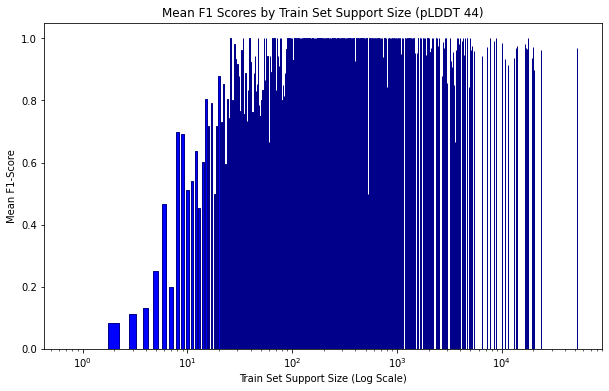

Plot saved to ./data_analysis/SF_F1_score/Mean_SF_F1_score_by_train_support_pLDDT_thresh_44.png
The set of unique values in the 'SF' column of CR_df is equal to the set of keys in sf_support_dict.
All values in 'f1-score' are between 0 and 1.


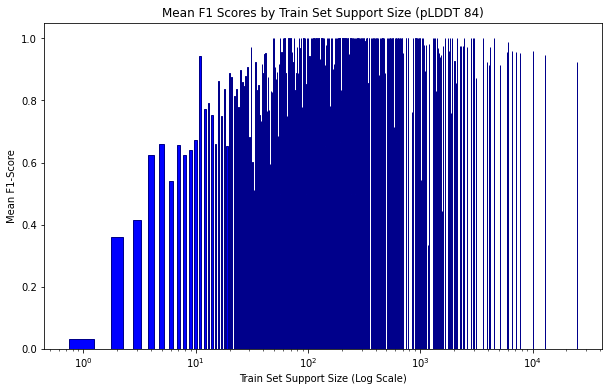

Plot saved to ./data_analysis/SF_F1_score/Mean_SF_F1_score_by_train_support_pLDDT_thresh_84.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_mean_f1_score_by_support(pLDDT_threshold):
    '''
    Function to plot mean F1 scores by Train Set Support Size
    based on the provided pLDDT threshold.
    '''

    # Set working directory
    os.chdir('write here the absolute path to the project root')

    # Ensure the directory exists
    os.makedirs('./data_analysis/SF_F1_score', exist_ok=True)

    # Load the classification report CSV
    best_model_classif_report_path = f'./results/classification_report/CR_ANN_ProstT5_full_2_blocks_dropout_0.3_layer_size_2048_pLDDT_{pLDDT_threshold}_AA+3Di.csv'
    CR_df = pd.read_csv(best_model_classif_report_path)

    # Exclude rows corresponding to 'accuracy', 'macro avg', and 'weighted avg'
    CR_df = CR_df.iloc[:-3]

    # Load the Train_ids_for_3Di_usage CSV and create a set of Domain_id
    train_ids_path = f'./data/Dataset/csv/Train_ids_for_3Di_usage_{pLDDT_threshold}.csv'
    df_train_ids = pd.read_csv(train_ids_path)

    # Create a set of Domain_id
    domain_id_set = set(df_train_ids['Domain_id'])

    # Load the Train.csv
    train_csv_path = './data/Dataset/csv/Train.csv'
    df_train = pd.read_csv(train_csv_path)

    # Filter out rows where the value in the 'Unnamed: 0' column is not in the domain_id_set
    df_train_filtered = df_train[df_train['Unnamed: 0'].isin(domain_id_set)]

    # Create a dictionary where the keys are unique values of the 'SF' column and the values are the sample size (support)
    sf_support_dict = df_train_filtered['SF'].value_counts().to_dict()

    # Verification: check if the unique values in the 'SF' column of CR_df are equal to the keys in sf_support_dict
    CR_first_column_set = set(CR_df['SF'].unique())
    sf_support_keys_set = set(sf_support_dict.keys())

    if CR_first_column_set == sf_support_keys_set:
        print('The set of unique values in the 'SF' column of CR_df is equal to the set of keys in sf_support_dict.')
    else:
        print('The sets are NOT equal.')
        print(f'Values in CR_df but not in sf_support_dict: {CR_first_column_set - sf_support_keys_set}')
        print(f'Values in sf_support_dict but not in CR_df: {sf_support_keys_set - CR_first_column_set}')

    # Add support column from sf_support_dict to CR_df
    CR_df['support_train'] = CR_df['SF'].map(sf_support_dict)

    # Verify that all values in 'f1-score' are between 0 and 1
    if CR_df['f1-score'].between(0, 1).all():
        print('All values in 'f1-score' are between 0 and 1.')
    else:
        print('There are values in 'f1-score' that are outside the range 0 to 1.')

    # Group by support_train and compute the mean of F1-scores for each group
    CR_df_grouped = CR_df.groupby('support_train')['f1-score'].mean().reset_index()

    # Sort by support from the train dataset
    CR_df_sorted = CR_df_grouped.sort_values(by='support_train', ascending=True)

    # Create a bar plot using matplotlib
    plt.figure(figsize=(10, 6))

    # Plot bars with mean F1 score on the y-axis and train support on the x-axis (log scale)
    plt.bar(CR_df_sorted['support_train'], CR_df_sorted['f1-score'], color='blue', edgecolor='darkblue', width=0.5)

    # Set x-axis to logarithmic scale
    plt.xscale('log')

    # Set title and labels
    plt.title(f'Mean F1 Scores by Train Set Support Size (pLDDT {pLDDT_threshold})')
    plt.xlabel('Train Set Support Size (Log Scale)')
    plt.ylabel('Mean F1-Score')

    # Save the plot as a PNG image with a white background
    plot_path = f'./data_analysis/SF_F1_score/Mean_SF_F1_score_by_train_support_pLDDT_thresh_{pLDDT_threshold}.png'
    plt.savefig(plot_path, format='png', dpi=300, facecolor='white')

    # Show the plot (optional)
    plt.show()

    print(f'Plot saved to {plot_path}')

# Example usage
plot_mean_f1_score_by_support(44)  # Plot with pLDDT threshold of 44
plot_mean_f1_score_by_support(84)  # Plot with pLDDT threshold of 84


In [ ]:
import pandas as pd
import os

def print_f1_scores_for_support_1(pLDDT_threshold):
    '''
    Function to print F1 scores of SF families where Train Set Support is 1
    based on the provided pLDDT threshold.
    '''

    # Set working directory
    os.chdir('write here the absolute path to the project root')

    # Load the classification report CSV
    best_model_classif_report_path = f'./results/classification_report/CR_ANN_ProstT5_full_2_blocks_dropout_0.3_layer_size_2048_pLDDT_{pLDDT_threshold}_AA+3Di.csv'
    CR_df = pd.read_csv(best_model_classif_report_path)

    # Exclude rows corresponding to 'accuracy', 'macro avg', and 'weighted avg'
    CR_df = CR_df.iloc[:-3]

    # Load the Train_ids_for_3Di_usage CSV and create a set of Domain_id
    train_ids_path = f'./data/Dataset/csv/Train_ids_for_3Di_usage_{pLDDT_threshold}.csv'
    df_train_ids = pd.read_csv(train_ids_path)

    # Create a set of Domain_id
    domain_id_set = set(df_train_ids['Domain_id'])

    # Load the Train.csv
    train_csv_path = './data/Dataset/csv/Train.csv'
    df_train = pd.read_csv(train_csv_path)

    # Filter out rows where the value in the 'Unnamed: 0' column is not in the domain_id_set
    df_train_filtered = df_train[df_train['Unnamed: 0'].isin(domain_id_set)]

    # Create a dictionary where the keys are unique values of the 'SF' column and the values are the sample size (support)
    sf_support_dict = df_train_filtered['SF'].value_counts().to_dict()

    # Add support column from sf_support_dict to CR_df
    CR_df['support_train'] = CR_df['SF'].map(sf_support_dict)

    # Filter the rows where train support is 1
    CR_df_support_1 = CR_df[CR_df['support_train'] == 1]

    # Print the SF family name and its F1 score
    for _, row in CR_df_support_1.iterrows():
        print(f'SF: {row['SF']}, F1-score: {row['f1-score']}')

# Example usage
print_f1_scores_for_support_1(84)  # For pLDDT threshold of 44


SF: 1.10.10.900, F1-score: 0.0
SF: 1.10.100.10, F1-score: 1.0
SF: 1.10.1200.30, F1-score: 0.0
SF: 1.10.150.480, F1-score: 0.0
SF: 1.10.150.60, F1-score: 0.0
SF: 1.10.246.20, F1-score: 0.0
SF: 1.10.287.1130, F1-score: 0.0
SF: 1.10.287.150, F1-score: 0.0
SF: 1.10.287.2110, F1-score: 0.0
SF: 1.10.287.3490, F1-score: 0.0
SF: 1.10.3350.10, F1-score: 0.0
SF: 1.10.720.40, F1-score: 0.0
SF: 1.20.1020.10, F1-score: 1.0
SF: 1.20.120.180, F1-score: 0.0
SF: 1.20.1250.70, F1-score: 0.0
SF: 1.20.1440.180, F1-score: 0.0
SF: 1.20.1710.10, F1-score: 0.0
SF: 1.20.5.1180, F1-score: 0.0
SF: 1.20.5.1190, F1-score: 0.0
SF: 1.20.5.140, F1-score: 0.0
SF: 1.20.5.220, F1-score: 0.0
SF: 1.20.5.2210, F1-score: 0.0
SF: 1.20.58.1190, F1-score: 0.0
SF: 1.20.58.160, F1-score: 0.0
SF: 1.20.58.240, F1-score: 0.0
SF: 1.20.940.10, F1-score: 0.0
SF: 1.20.960.20, F1-score: 0.0
SF: 1.25.40.240, F1-score: 0.0
SF: 2.10.25.20, F1-score: 0.0
SF: 2.10.69.10, F1-score: 0.0
SF: 2.20.220.20, F1-score: 0.0
SF: 2.20.28.230, F1-score:

## 6. Training set SF support analysis

sum support 1035679

Number of removed SFs: 32
Number of domains belonging to removed SFs: 188
Removed SFs and their support (number of domains):

SF: 2.60.98.10  -->  Support: 22
SF: 3.90.209.20  -->  Support: 21
SF: 2.170.30.10  -->  Support: 19
SF: 2.10.77.10  -->  Support: 13
SF: 3.30.500.30  -->  Support: 11
SF: 2.40.490.10  -->  Support: 9
SF: 1.10.287.2480  -->  Support: 9
SF: 1.10.437.20  -->  Support: 7
SF: 2.60.120.170  -->  Support: 7
SF: 2.60.40.350  -->  Support: 7
SF: 2.60.90.10  -->  Support: 6
SF: 2.60.120.660  -->  Support: 6
SF: 1.20.5.4730  -->  Support: 5
SF: 3.30.380.10  -->  Support: 5
SF: 2.60.40.2920  -->  Support: 5
SF: 1.10.10.510  -->  Support: 5
SF: 2.60.240.10  -->  Support: 4
SF: 1.10.2050.10  -->  Support: 3
SF: 1.10.3390.10  -->  Support: 3
SF: 2.60.90.30  -->  Support: 3
SF: 3.30.70.390  -->  Support: 3
SF: 1.10.8.130  -->  Support: 2
SF: 1.10.8.950  -->  Support: 2
SF: 3.30.160.330  -->  Support: 2
SF: 3.30.70.1840  -->  Support: 2
SF: 2.40.310.10  -->

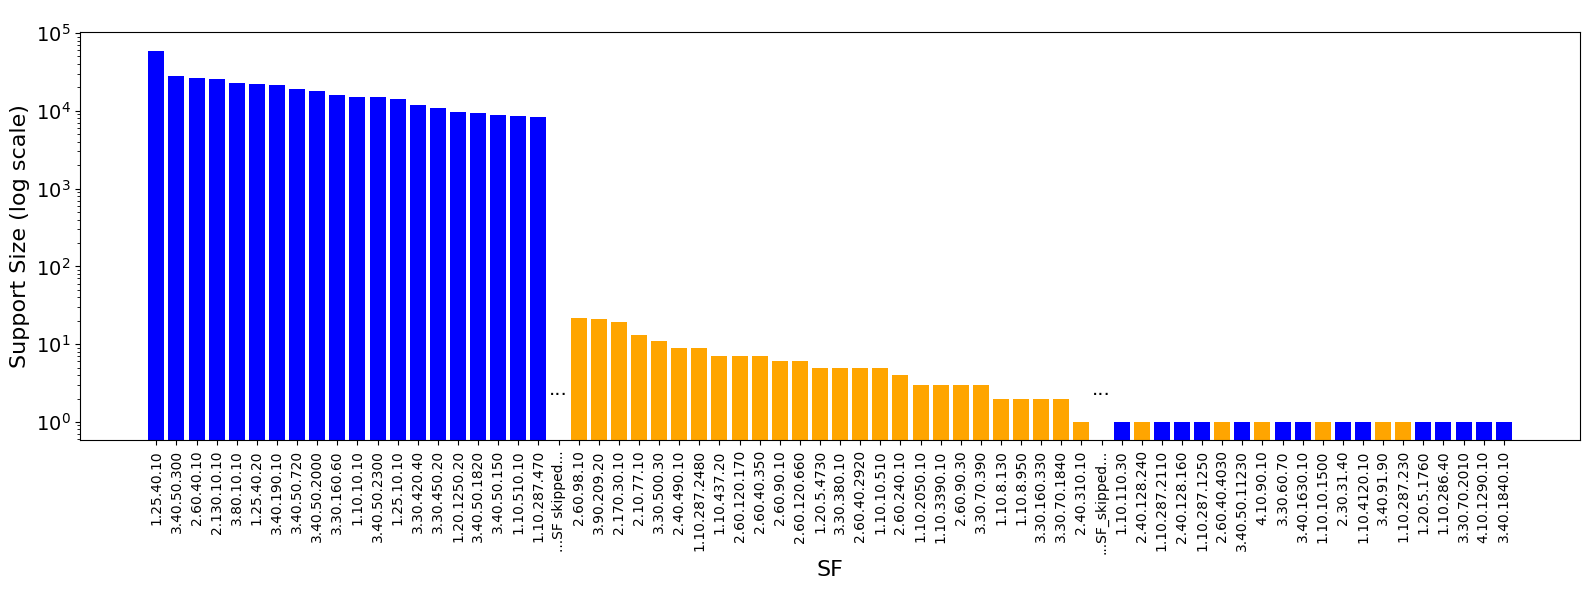

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')

# Load training data
train_df = pd.read_csv('./data/Dataset/csv/Train.csv')
support_counts = train_df['SF'].value_counts()
print("sum support", sum(support_counts))

# Identify removed SFs
train_ids_df = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_pLDDT_threshold_24.csv')
train_ids = set(train_ids_df['Domain_id'])
train_csv_ids = set(train_df['Unnamed: 0'])
missing_ids = train_csv_ids - train_ids
train_remaining_rows = train_df[~train_df['Unnamed: 0'].isin(missing_ids)]
train_remaining_SF = set(train_remaining_rows['SF'].unique())
all_train_SF = set(train_df['SF'].unique())
removed_SF = all_train_SF - train_remaining_SF

# Get top 20, bottom 20, and removed SFs
top_20 = support_counts.head(20)
bottom_20 = support_counts.tail(20)
removed_sf_supports = support_counts[support_counts.index.isin(removed_SF)]

# Create ordered set of SFs to plot: top 20 + '...removed...' + removed + '...bottom...' + bottom 20
sf_order = list(top_20.index)
sf_order.append('...SF skipped...')  # first gap

# Add removed SFs (excluding those already included)
removed_only = [sf for sf in removed_sf_supports.index if sf not in top_20.index and sf not in bottom_20.index]
sf_order.extend(removed_only)

sf_order.append('...SF_skipped...')  # second gap

# Ensure no duplicates and keep the real bottom 20
bottom_20_remaining = [sf for sf in bottom_20.index if sf not in sf_order]
sf_order.extend(bottom_20_remaining)

# Construct plotting values
sf_values = []
colors = []

for sf in sf_order:
    if '...' in sf:  # handles both gap labels
        sf_values.append(1)
        colors.append('white')
    else:
        sf_values.append(support_counts[sf])
        colors.append('orange' if sf in removed_SF else 'blue')

# Labels
sf_labels = sf_order

# Plot
plt.figure(figsize=(16, 6))
bars = plt.bar(sf_labels, sf_values, color=colors)

for i, sf in enumerate(sf_labels):
    if '...' in sf:
        plt.text(i, 2, '...', ha='center', va='bottom', fontsize=14, color='black')

plt.yscale('log')
plt.xlabel('SF', fontsize=16)
plt.ylabel('Support Size (log scale)', fontsize=16)
plt.title(' ')
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
#plt.show()
# Save the plot
plt.savefig(
    os.path.expanduser('~/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/paper_related_stuff/paper_picture_ressources/sf_support_plot.png'),
    dpi=300
)



print(f"\nNumber of removed SFs: {len(removed_sf_supports)}")

removed_sf_domain_count = train_df[train_df['SF'].isin(removed_SF)].shape[0]
print(f"Number of domains belonging to removed SFs: {removed_sf_domain_count}")

print("Removed SFs and their support (number of domains):\n")

for sf, count in removed_sf_supports.items():
    print(f"SF: {sf}  -->  Support: {count}")


In [8]:
import pandas as pd
import os
# Set working directory
os.chdir('write here the absolute path to the project root')

def get_top_sf_by_support(n=50):
    '''
    Function to get the top N SF (Superfamilies) based on their support
    in the unfiltered Train dataset.
    '''

    # Load the Train.csv
    train_csv_path = './data/Dataset/csv/Train.csv'
    df_train = pd.read_csv(train_csv_path)

    # Count the support for each SF and get the top N SFs by support
    sf_support_counts = df_train['SF'].value_counts()
    top_sf_support = sf_support_counts.head(n)

    # print sum of the top n support
    print(f'Sum of the support for the top {n} SFs: {top_sf_support.sum()}')

    # Optional: Save to CSV for reference
    top_sf_support_df = top_sf_support.reset_index()
    top_sf_support_df.columns = ['SF', 'Support']
    top_sf_support_df.to_csv('./data_analysis/Support_analysis/Top_SF_by_support_unfiltered.csv', index=False)

    print('Top SFs saved to './data_analysis/Support_analysis/Top_SF_by_support_unfiltered.csv'')

get_top_sf_by_support(50)


SyntaxError: invalid syntax (1920607068.py, line 28)

In [ ]:
import pandas as pd
import os
# Set working directory
os.chdir('write here the absolute path to the project root')

def get_top_sf_by_support(n=50):
    '''
    Function to get the top N SF (Superfamilies) based on their support
    in the unfiltered Train dataset.
    '''

    # Load the Train.csv
    train_csv_path = './data/Dataset/csv/Train.csv'
    df_train = pd.read_csv(train_csv_path)

    # Count the support for each SF and get the top N SFs by support
    sf_support_counts = df_train['SF'].value_counts()
    top_sf_support = sf_support_counts.head(n)

    # Print sum of the top n support
    print(f'Sum of the support for the top {n} SFs: {top_sf_support.sum()}')

    # Save the top SFs to CSV for reference
    top_sf_support_df = top_sf_support.reset_index()
    top_sf_support_df.columns = ['SF', 'Support']
    top_sf_support_df.to_csv('./data_analysis/Support_analysis/Top_SF_by_support_unfiltered.csv', index=False)

    print('Top SFs saved to './data_analysis/Support_analysis/Top_SF_by_support_unfiltered.csv'')

    # Return the list of top SF labels
    return top_sf_support.index.tolist()

# Get the top SF labels based on support
top_sf_labels = get_top_sf_by_support(50)

# Load Train.csv
train_csv_path = './data/Dataset/csv/Train.csv'
df_train = pd.read_csv(train_csv_path)

# Filter Domain_ids in Train.csv where the SF label is in the top SFs
top_sf_domain_ids = df_train[df_train['SF'].isin(top_sf_labels)]['Unnamed: 0'].tolist()

# Print list len
print(f'Number of Domain_ids in Train.csv for the top SFs: {len(top_sf_domain_ids)}')


## 7. Lost SF representativity

In [17]:
import pandas as pd
import os
# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')


# SF support threshold ranking building ##############################################################################

# Load the CSV files
train_set_ids_path = './data/Dataset/csv/Train.csv'
train_df = pd.read_csv(train_set_ids_path)


# Count the support of each value in the "SF" column
support_counts = train_df['SF'].value_counts()

# Create a DataFrame with the counts and rank the "SF" values by support size (descending order)
support_ranking = support_counts.reset_index()
support_ranking.columns = ['SF', 'Support']
support_ranking = support_ranking.sort_values(by='Support', ascending=False).reset_index(drop=True)


# Add a ranking column (starting from 1)
support_ranking['Support_Rank'] = support_ranking.index + 1


# Extracting filtered SF #############################################################################################

# Load the CSV files
train_ids_df = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_pLDDT_threshold_24.csv')

# Extract IDs from the respective columns
train_ids = set(train_ids_df['Domain_id'])
train_csv_ids = set(train_df['Unnamed: 0'])

# Find IDs in Train.csv that are not in Train_ids_for_3Di_usage_pLDDT_threshold_24.csv
missing_ids = train_csv_ids - train_ids

# print("len missing_ids", len(missing_ids))

# Filter rows in train_df where 'Unnamed: 0' is in missing_ids
train_remaining_rows = train_df[~train_df['Unnamed: 0'].isin(missing_ids)]

# Extract unique 'SF' values
train_remaining_SF = train_remaining_rows['SF'].unique()
all_train_SF = train_df['SF'].unique()

# Compute removed SF values
removed_SF = set(all_train_SF) - set(train_remaining_SF)

# Convert back to a list if needed
removed_SF = list(removed_SF)

# print("len removed_SF", len(removed_SF))




# printing support ranking of filtered SF from pLDDT threshold 24 (+ 3Di extraction) #################################

# Get the support ranking of filtered SF
filtered_sf_ranking = support_ranking[support_ranking['SF'].isin(removed_SF)].reset_index(drop=True)

# Print the filtered support ranking
print("Support and support ranking of removed SF when using 3Di and pLDDT threshold 24",filtered_sf_ranking)





Support and support ranking of removed SF when using 3Di and pLDDT threshold 24                SF  Support  Support_Rank
0      2.60.98.10       22          1453
1     3.90.209.20       21          1461
2     2.170.30.10       19          1490
3      2.10.77.10       13          1572
4     3.30.500.30       11          1602
5     2.40.490.10        9          1625
6   1.10.287.2480        9          1629
7     1.10.437.20        7          1645
8     2.60.40.350        7          1651
9    2.60.120.170        7          1652
10     2.60.90.10        6          1663
11   2.60.120.660        6          1666
12    1.10.10.510        5          1670
13    1.20.5.4730        5          1671
14   2.60.40.2920        5          1676
15    3.30.380.10        5          1678
16    2.60.240.10        4          1694
17    3.30.70.390        3          1703
18   1.10.3390.10        3          1704
19   1.10.2050.10        3          1714
20     2.60.90.30        3          1717
21     1.10.8.130 

In [22]:
import pandas as pd
import os
# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')
from IPython.display import display
pd.set_option('display.max_rows', 200)  # Show up to 200 rows

# SF support threshold ranking building ##############################################################################

# Load the CSV files
train_set_ids_path = './data/Dataset/csv/Train.csv'
train_df = pd.read_csv(train_set_ids_path)


# Count the support of each value in the "SF" column
support_counts = train_df['SF'].value_counts()

# Create a DataFrame with the counts and rank the "SF" values by support size (descending order)
support_ranking = support_counts.reset_index()
support_ranking.columns = ['SF', 'Support']
support_ranking = support_ranking.sort_values(by='Support', ascending=False).reset_index(drop=True)


# Add a ranking column (starting from 1)
support_ranking['Support_Rank'] = support_ranking.index + 1


# Extracting filtered SF #############################################################################################

# Load the CSV files
train_ids_df = pd.read_csv('./data/Dataset/csv/Train_ids_for_3Di_usage_pLDDT_threshold_0_support_threshold_10.csv')

# Extract IDs from the respective columns
train_ids = set(train_ids_df['Domain_id'])
train_csv_ids = set(train_df['Unnamed: 0'])

# Find IDs in Train.csv that are not in Train_ids_for_3Di_usage_pLDDT_threshold_0_support_threshold_10.csv
missing_ids = train_csv_ids - train_ids

# print("len missing_ids", len(missing_ids))

# Filter rows in train_df where 'Unnamed: 0' is in missing_ids
train_remaining_rows = train_df[~train_df['Unnamed: 0'].isin(missing_ids)]

# Extract unique 'SF' values
train_remaining_SF = train_remaining_rows['SF'].unique()
all_train_SF = train_df['SF'].unique()

# Compute removed SF values
removed_SF = set(all_train_SF) - set(train_remaining_SF)

# Convert back to a list if needed
removed_SF = list(removed_SF)

# print("len removed_SF", len(removed_SF))




# printing support ranking of filtered SF from pLDDT threshold 24 (+ 3Di extraction) #################################

# Get the support ranking of filtered SF
filtered_sf_ranking = support_ranking[support_ranking['SF'].isin(removed_SF)].reset_index(drop=True)

# Print the filtered support ranking
print("Support and support ranking of removed SF when using 3Di and pLDDT threshold 0 and support threshold 10")
# Display the DataFrame in a scrollable format
display(filtered_sf_ranking)



Support and support ranking of removed SF when using 3Di and pLDDT threshold 0 and support threshold 10


,SF,Support,Support_Rank
0,2.60.98.10,22,1453
1,3.90.209.20,21,1461
2,2.170.30.10,19,1490
3,2.10.77.10,13,1572
4,3.30.500.30,11,1602
5,3.30.70.860,10,1606
6,1.20.5.3070,10,1607
7,3.30.70.1360,10,1608
8,1.20.1440.140,10,1609
9,2.30.30.50,10,1610


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')

# Load training data
train_df = pd.read_csv('./data/Dataset/csv/Train.csv')
support_counts = train_df['SF'].value_counts()
low_support_count = (support_counts <= 10).sum()
print(f"Number of SFs with support ≤ 10: {low_support_count}")
print("sum support", sum(support_counts))

Number of SFs with support ≤ 10: 167
sum support 1035679


## 8. ANN Classifier grid search analysis

In [4]:
import pandas as pd
import os
# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')

# Load the CSV file into a DataFrame
file_path = './results/perf_dataframe.csv'
df = pd.read_csv(file_path)

# Define the specific hyperparameter combination
target_combination = {
    'Nb_Layer_Block': 2,
    'Dropout': 0.3,
    'Input_Type': 'AA+3Di',
    'Layer_size': 2048,
    'pLDDT_threshold': 24,
    'is_top_50_SF': False,
    'Support_threshold': 0
}

# Filter the DataFrame for the specific hyperparameter combination
filtered_df = df[
    (df['Nb_Layer_Block'] == target_combination['Nb_Layer_Block']) &
    (df['Dropout'] == target_combination['Dropout']) &
    (df['Input_Type'] == target_combination['Input_Type']) &
    (df['Layer_size'] == target_combination['Layer_size']) &
    (df['pLDDT_threshold'] == target_combination['pLDDT_threshold']) &
    (df['is_top_50_SF'] == target_combination['is_top_50_SF']) &
    (df['Support_threshold'] == target_combination['Support_threshold'])
]

# Check if any models match the criteria
if filtered_df.empty:
    print("No models found with the specified hyperparameter combination.")
else:
    print("F1 Scores for each model with the specified hyperparameter combination:\n")
    for index, row in filtered_df.iterrows():
        print(f"Model: {row['Model']}, F1 Score: {row['F1_Score']:.4f}")

F1 Scores for each model with the specified hyperparameter combination:

Model: ProstT5_full, F1 Score: 0.8228
Model: ProstT5_half, F1 Score: 0.8192
Model: ProtT5_new, F1 Score: 0.8063
Model: ESM2, F1 Score: 0.8064
Model: Ankh_base, F1 Score: 0.7733
Model: Ankh_large, F1 Score: 0.7829
Model: TM_Vec, F1 Score: 0.7650


In [4]:
import pandas as pd
import os
# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')


# Load the dataframe
df = pd.read_csv('./results/perf_dataframe.csv')

# Filter for Input_Type = '3Di'
filtered_df = df[df['Input_Type'] == '3Di']

# Find the row with the highest F1_Score
best_model = filtered_df.loc[filtered_df['F1_Score'].idxmax()]

# Print the best model's name, hyperparameters, and F1 Score
print("Best Model with Input_Type = 3Di:")
print(best_model)

Best Model with Input_Type = 3Di:
Model                ProstT5_full
Nb_Layer_Block                  2
Dropout                       0.2
Input_Type                    3Di
Layer_size                   1024
pLDDT_threshold              14.0
is_top_50_SF                False
Support_threshold               0
F1_Score                 0.662212
Name: 212, dtype: object


In [1]:
import pandas as pd
import os
# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')


# Load the dataframe
df = pd.read_csv('./results/perf_dataframe.csv')

# Filter for is_top_50_SF = True
filtered_df = df[df['is_top_50_SF'] == True]

# Find the row with the highest F1_Score
best_model = filtered_df.loc[filtered_df['F1_Score'].idxmax()]

# Print the best model's name, hyperparameters, and F1 Score
print("Best Model with is_top_50_SF = True:")
print(best_model)

Best Model with is_top_50_SF = True:
Model                ProstT5_full
Nb_Layer_Block                  2
Dropout                       0.3
Input_Type                 AA+3Di
Layer_size                   2048
pLDDT_threshold               4.0
is_top_50_SF                 True
Support_threshold               0
F1_Score                 0.971463
Name: 338, dtype: object


## 9. Final plots tweeks


### 9.1 F1 score drop along pLDDT threshold values and training set size

In [7]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os

# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')

def plot_f1_score_evolution_with_dataset_size(dataframe, x_param, model, input_types, title=None, **conditions):
    '''
    Plots F1 score evolution for a selected model along a specified parameter,
    with a secondary y-axis showing Training Set Size from Lost_SF_and_Train_size.csv.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing model results.
        x_param (str): The parameter for the x-axis (e.g., 'pLDDT_threshold').
        model (str): The model name to plot.
        input_types (list): List of input types to include.
        conditions (dict): Filtering conditions.

    Returns:
        None
    '''

    # Enforce x_param restriction
    if x_param != 'pLDDT_threshold':
        raise ValueError("The x_param must be 'pLDDT_threshold'.")

    # Filter the model data
    df_filtered = dataframe[dataframe['Model'] == model]
    
    # Apply filtering conditions
    filtered_dfs = []
    for input_type in input_types:
        df_subset = df_filtered[df_filtered['Input_Type'] == input_type]
        for param, value in conditions.items():
            if value is not None:
                if input_type == 'AA' and param == 'pLDDT_threshold':
                    df_subset = df_subset[df_subset[param] == 0]
                else:
                    df_subset = df_subset[df_subset[param] == value]
        filtered_dfs.append(df_subset)

    df_filtered = pd.concat(filtered_dfs)

    #DEBUG
    print(f"Filtered DataFrame shape: {df_filtered.shape}")
    print(df_filtered)

    # Load Training Set Size data
    train_size_df = pd.read_csv('./data/Dataset/csv/Lost_SF_and_Train_size.csv')

    train_size_df = train_size_df[
    (train_size_df['Top_50_filtering'] == False) & 
    (train_size_df['Support_threshold'] == 0)
]

    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot F1 Score on primary y-axis
    sns.lineplot(data=df_filtered, x=x_param, y='F1_Score', hue='Input_Type', marker='o', ax=ax1)

    highlight_point = df_filtered[(df_filtered['Input_Type'] == 'AA') & (df_filtered[x_param] == 0)]
    if not highlight_point.empty:
        ax1.plot(
        highlight_point[x_param],
        highlight_point['F1_Score'],
        marker='o',
        markersize=5,
        color='blue',
        label=None,
        zorder=10  # ensures it's drawn on top
    )

    ax1.set_xlabel(x_param, fontsize=16)
    ax1.set_ylabel('F1 Score', fontsize=16)
    ax1.tick_params(axis='both', labelsize=14)
    ax1.grid(True)
    ax1.legend(title='Input_Type', loc='center left', bbox_to_anchor=(0, 0.5), fontsize=12)

    # Create secondary axis for Training Set Size
    ax2 = ax1.twinx()
    ax2.plot(train_size_df['pLDDT_threshold'], train_size_df['Training_set_size'], 
              color='red', linestyle='--', marker='x', label='Training Set Size')
    ax2.set_ylabel('Training set size in number of domains', color='red', fontsize=16)
    ax2.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useOffset=False)
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: r"${:.0f} \times 10^{{{}}}$".format(x / 10**(int(np.log10(x))) if x != 0 else 0, int(np.log10(x)) if x != 0 else 0)))
    ax2.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax2.legend(loc='upper right', fontsize=12)


    # Title and Save
    plt.title(title)
    if title:
        plot_filename = f'./results/f1_score_plots/{title}.png'
    else:
        plot_filename = f'./results/f1_score_plots/unnamed_plot.png'

    os.makedirs(os.path.dirname(plot_filename), exist_ok=True)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()


df_results_path = './results/perf_dataframe.csv'
df = pd.read_csv(df_results_path)

input_types = ['AA', '3Di', 'AA+3Di']
model = 'ProstT5_full'
x_param = 'pLDDT_threshold'
Dropout = 0.3
layer_size = 1024
nb_layer_block = 2
is_top_50_SF = False
support_threshold = 0

plot_f1_score_evolution_with_dataset_size(
    dataframe=df, 
    x_param=x_param, 
    model=model, 
    input_types=input_types, 
    title=' ',
    Layer_size=layer_size, 
    Dropout=Dropout,
    Nb_Layer_Block=nb_layer_block,
    is_top_50_SF=is_top_50_SF,
    Support_threshold=support_threshold
)



Filtered DataFrame shape: (17, 9)
            Model  Nb_Layer_Block  Dropout Input_Type  Layer_size  \
108  ProstT5_full               2      0.3         AA        1024   
253  ProstT5_full               2      0.3        3Di        1024   
254  ProstT5_full               2      0.3        3Di        1024   
255  ProstT5_full               2      0.3        3Di        1024   
256  ProstT5_full               2      0.3        3Di        1024   
257  ProstT5_full               2      0.3        3Di        1024   
258  ProstT5_full               2      0.3        3Di        1024   
259  ProstT5_full               2      0.3        3Di        1024   
76   ProstT5_full               2      0.3     AA+3Di        1024   
315  ProstT5_full               2      0.3     AA+3Di        1024   
316  ProstT5_full               2      0.3     AA+3Di        1024   
317  ProstT5_full               2      0.3     AA+3Di        1024   
318  ProstT5_full               2      0.3     AA+3Di        1024   


### 9.2 F1 score along pLDDT threshold values comparison for threshold values

In [1]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set working directory
os.chdir('/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe')


def plot_f1_score_evolution_by_support_threshold(dataframe, x_param, model, input_types, title=None, support_thresholds=None, **conditions):
    '''
    Plots F1 score evolution for a selected model along a specified parameter,
    with different curves for each Support_threshold.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the results.
        x_param (str): The parameter to plot on the x-axis.
        model (str): The model to plot.
        input_types (list): List of input types to include.
        support_thresholds (list): List of Support_threshold values to plot as separate curves.
        conditions (dict): Dictionary of conditions to filter the data (optional).

    Returns:
        None
    '''
    if support_thresholds is None:
        support_thresholds = [0]

    df_filtered = dataframe[dataframe['Model'] == model]

    if input_types is not None:
        df_filtered = df_filtered[df_filtered['Input_Type'].isin(input_types)]

    filtered_dfs = []

    for support_threshold in support_thresholds:
        df_subset = df_filtered[df_filtered['Support_threshold'] == support_threshold]
        for param, value in conditions.items():
            if value is not None:
                df_subset = df_subset[df_subset[param] == value]
        df_subset = df_subset.copy()
        df_subset['Support_threshold_label'] = f'Support = {support_threshold}'
        filtered_dfs.append(df_subset)

    df_final = pd.concat(filtered_dfs)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_final, x=x_param, y='F1_Score', hue='Support_threshold_label', marker='o')

    plt.title(title)
    plt.xlabel(x_param, fontsize=16)
    plt.ylabel('F1 Score', fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(title='Support Threshold', fontsize=11, title_fontsize='12', loc='upper right')
    plt.grid(True)

    # Save the plot
    plot_filename = f'./results/f1_score_plots/{title if title else "unnamed_plot"}.png'
    os.makedirs(os.path.dirname(plot_filename), exist_ok=True)
    plt.savefig(plot_filename)
    plt.close()


df_results_path = './results/perf_dataframe.csv'
df = pd.read_csv(df_results_path)

input_types = ['AA+3Di']
model = 'ProstT5_full'
x_param = 'pLDDT_threshold'
Dropout = 0.3
layer_size = 2048
nb_layer_block = 2
is_top_50_SF = False
support_thresholds = [0, 10]

plot_f1_score_evolution_by_support_threshold(
    dataframe=df,
    x_param=x_param,
    model=model,
    input_types=input_types,
    title=" ",
    support_thresholds=support_thresholds,
    Layer_size=layer_size,
    Dropout=Dropout,
    Nb_Layer_Block=nb_layer_block,
    is_top_50_SF=is_top_50_SF
)



In [8]:
import pandas as pd

# Path to the CSV file
csv_path = "/home/orfeu/Documents/documents/important/travail/stage/stage/stage_2023_2024/Recherche_scientifique_Londre/Auto_Prot_function_detection_and_classification/work/code/CATHe/results/perf_dataframe.csv"

# Load the dataframe
df = pd.read_csv(csv_path)

# Filter the rows
filtered_df = df[
    (df["Model"] == "ProstT5_full") &
    (df["Dropout"] == 0.3) &
    (df["Layer_size"] == 2048) &
    (df["Nb_Layer_Block"] == 2) &
    (df["Input_Type"] == "AA")
]

# Show the filtered rows
print(filtered_df)


            Model  Nb_Layer_Block  Dropout Input_Type  Layer_size  \
325  ProstT5_full               2      0.3         AA        2048   

     pLDDT_threshold  is_top_50_SF  Support_threshold  F1_Score  
325              0.0         False                  0  0.785697  
